Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [46]:
from random import random, seed
from itertools import product, accumulate
import numpy as np
from matplotlib import pyplot as plt

from icecream import ic

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [67]:
""" UNIVERSE_SIZE = 100
NUM_SETS = 10
DENSITY = 0.2
TEMPERATURE = 5 """

""" UNIVERSE_SIZE = 1000
NUM_SETS = 100
DENSITY = 0.2
TEMPERATURE = 50 """

UNIVERSE_SIZE = 10000
NUM_SETS = 1000
DENSITY = 0.2
TEMPERATURE = 1000

""" UNIVERSE_SIZE = 100000
NUM_SETS = 10000    
DENSITY = 0.1
TEMPERATURE = 50000 """

""" UNIVERSE_SIZE = 100000
NUM_SETS = 10000    
DENSITY = 0.2
TEMPERATURE = 50000 """

""" UNIVERSE_SIZE = 100000
NUM_SETS = 10000    
DENSITY = 0.3
TEMPERATURE = 50000 """

N_STEPS = 10000

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [48]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [49]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()


def fitness(solution):
    """Returns the fitness of a solution (to be maximized)"""
    return (valid(solution), -cost(solution))

## Have Fun!

In [50]:
# A dumb solution of "all" sets
dumb_solution = np.full(NUM_SETS, True)
ic(fitness(dumb_solution))

ic| fitness(dumb_solution): (np.True_, np.float64(-4278660.733537156))


(np.True_, np.float64(-4278660.733537156))

In [51]:
# A random solution with random 50% of the sets
initial_solution = rng.random(NUM_SETS) < 0.5
ic(fitness(initial_solution))

ic| fitness(initial_solution): (np.True_, np.float64(-2138156.8800836694))


(np.True_, np.float64(-2138156.8800836694))

## Random-Mutation Hill Climber with single mutation

In [52]:
def single_tweak(solution: np.ndarray) -> np.ndarray:
    new_solution = solution.copy()
    index = rng.integers(0, NUM_SETS)
    new_solution[index] = not new_solution[index]
    return new_solution

ic| solution_fitness: (np.True_, np.float64(-2114337.093737552))
ic| fitness(solution): (np.True_, np.float64(-133245.0651536347))
ic| history.index(fitness(solution)[1]): 4307


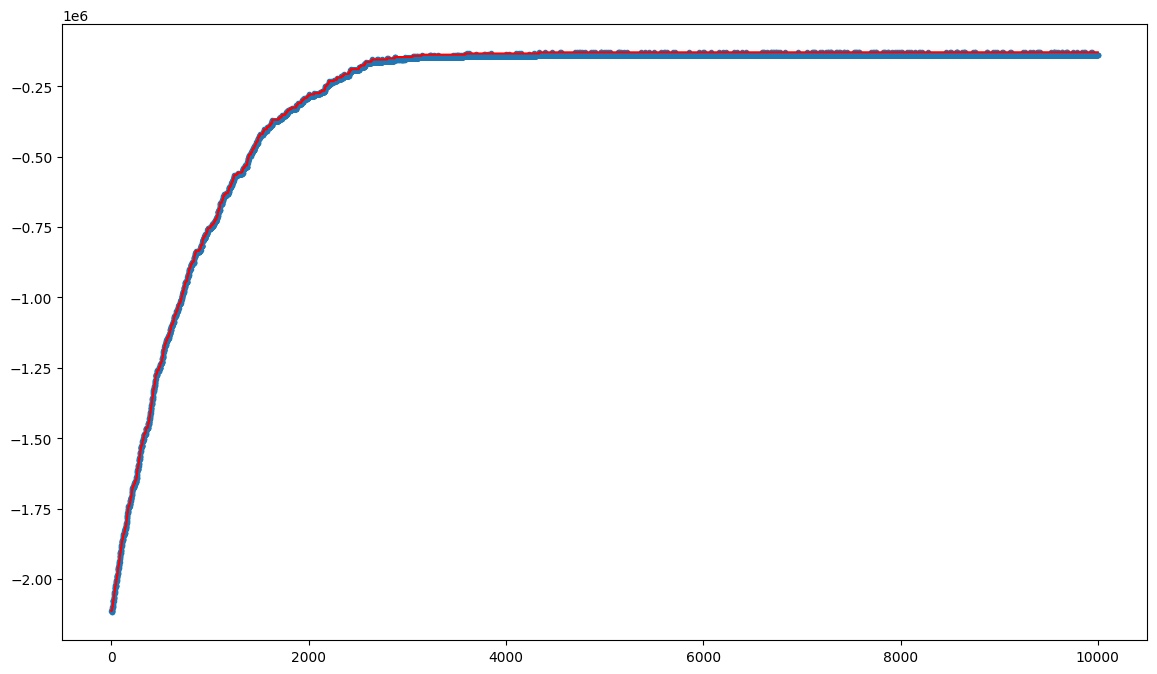

In [53]:
solution = rng.random(NUM_SETS) < 0.5
solution_fitness = fitness(solution)
ic(solution_fitness)
history = [solution_fitness[1]]


for step in range(N_STEPS):
    new_solution = single_tweak(solution)
    history.append(fitness(new_solution)[1])
    if fitness(new_solution) > solution_fitness:
        solution = new_solution
        solution_fitness = fitness(solution)
ic(fitness(solution))
ic(history.index(fitness(solution)[1]))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

## Random-Mutation Hill Climber with multiple mutation

In [77]:
def multi_tweak(solution: np.ndarray) -> np.ndarray:
    new_solution = solution.copy()
    index = None
    while index is None or np.random.random() < 0.4:
        index = np.random.randint(0, NUM_SETS)
        new_solution[index] = not new_solution[index]
    return new_solution

ic| solution_fitness: (np.True_,

 np.float64(-2118625.5397267807))
ic| fitness(solution): (np.True_, np.float64(-130521.25639678322))
ic| history.index(fitness(solution)[1]): 7529


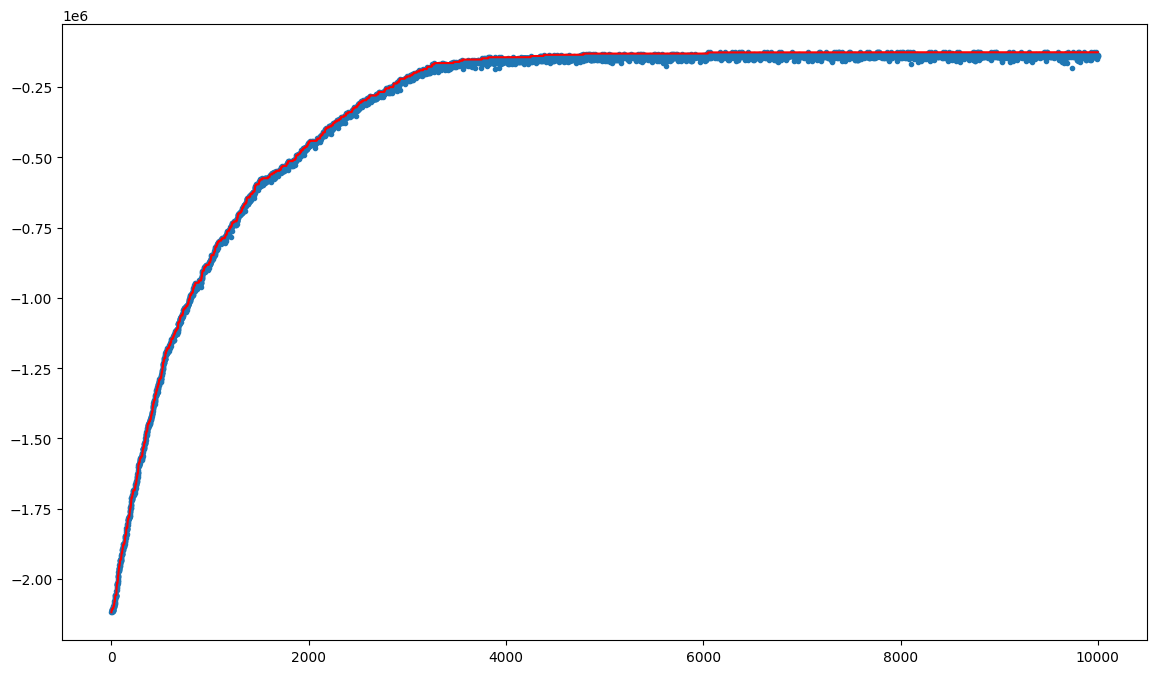

In [80]:
solution = rng.random(NUM_SETS) < 0.5
solution_fitness = fitness(solution)
ic(solution_fitness)
history = [solution_fitness[1]]


for step in range(N_STEPS):
    new_solution = multi_tweak(solution)
    history.append(fitness(new_solution)[1])
    if fitness(new_solution) > solution_fitness:
        solution = new_solution
        solution_fitness = fitness(solution)
ic(fitness(solution))
ic(history.index(fitness(solution)[1]))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

## Random-Mutation Hill Climber with multiple mutation and simulated annealing

In [64]:
def simulated_annealing(solution_fitness, new_solution_fitness, temp):
    accepting_probability = np.exp(-(solution_fitness[1] - new_solution_fitness[1]) / temp)
    #ic(accepting_probability)
    return np.random.random() < accepting_probability

ic| solution_fitness: (np.True_, np.float64(-2138156.8800836694))
ic| fitness(solution): (np.True_, np.float64(-122369.73158341543))
ic| history.index(fitness(solution)[1]): 7770


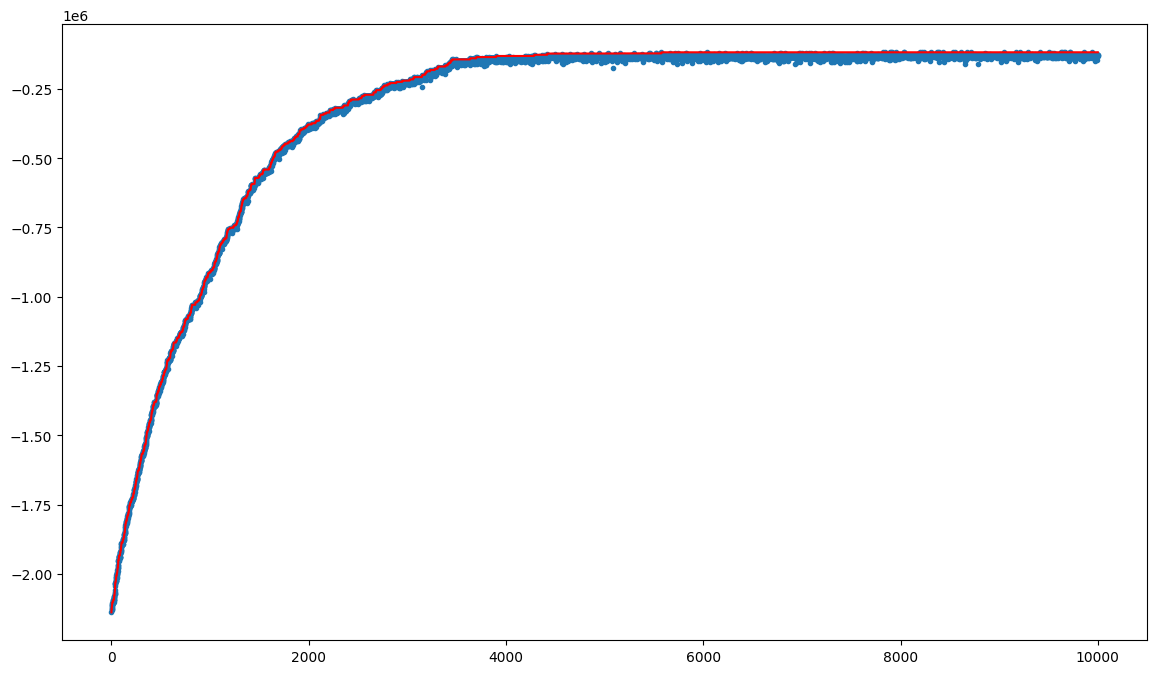

In [68]:
solution = rng.random(NUM_SETS) < 0.5
solution_fitness = fitness(solution)
ic(solution_fitness)
history = [solution_fitness[1]]
temp = TEMPERATURE

for step in range(N_STEPS):
    new_solution = multi_tweak(solution)
    history.append(fitness(new_solution)[1])
    if fitness(new_solution) > solution_fitness or (fitness(new_solution)[0] and simulated_annealing(solution_fitness, fitness(new_solution), temp)):
        solution = new_solution
        solution_fitness = fitness(solution)
    temp *= 0.99
ic(fitness(solution))
ic(history.index(fitness(solution)[1]))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")